In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


In [3]:
# 1. Flatten the images from (28, 28) to 784
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# 2. Normalize the pixel values from [0, 255] to [0, 1]
X_train_norm = X_train_flat.astype('float32') / 255.0
X_test_norm = X_test_flat.astype('float32') / 255.0

print(f"Flattened training data shape: {X_train_norm.shape}")

Flattened training data shape: (60000, 784)


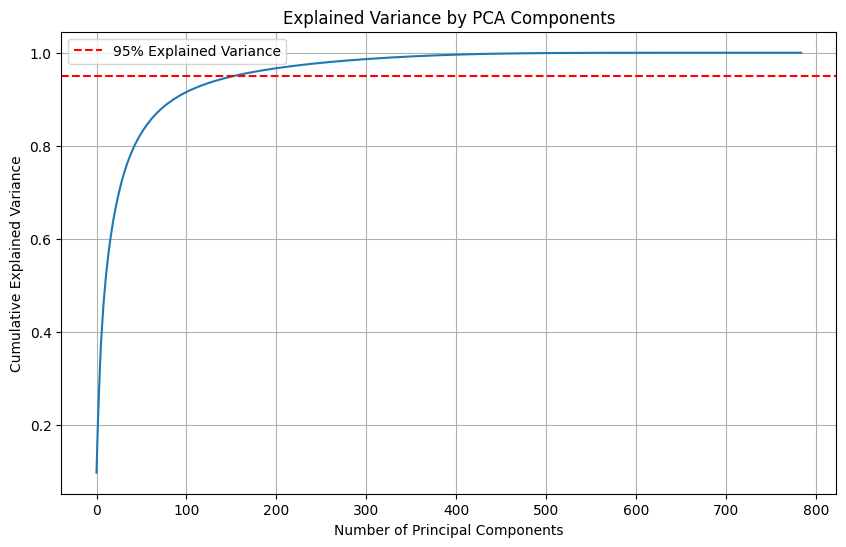

In [4]:
# Fit PCA to find the principal components
pca_784 = PCA()
pca_784.fit(X_train_norm)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca_784.explained_variance_ratio_))
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.legend()
plt.show()

In [7]:
N_COMPONENTS = 100

# Create a new PCA instance with the desired number of components
pca = PCA(n_components=N_COMPONENTS)
pca.fit(X_train_norm)


PCA(n_components=100)

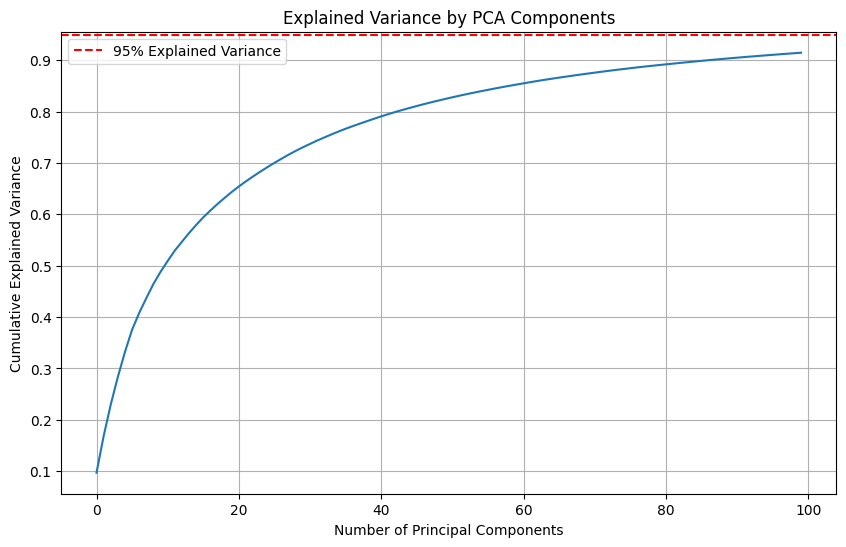

In [8]:
# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.legend()
plt.show()

In [9]:
# Fit PCA on the training data and transform it
X_train_pca = pca.fit_transform(X_train_norm)

# Use the SAME fitted PCA to transform the test data
X_test_pca = pca.transform(X_test_norm)

print(f"Original shape: {X_train_norm.shape}")
print(f"Shape after PCA: {X_train_pca.shape}")

Original shape: (60000, 784)
Shape after PCA: (60000, 100)


In [10]:
knn = KNeighborsClassifier(n_neighbors=5)

print("Training the k-NN classifier...")
knn.fit(X_train_pca, y_train)
print("Training complete.")

Training the k-NN classifier...
Training complete.


Model Accuracy: 97.27%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.97      1.00      0.98      1135
           2       0.98      0.97      0.97      1032
           3       0.97      0.96      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.99      0.98       958
           7       0.96      0.97      0.97      1028
           8       0.98      0.95      0.97       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



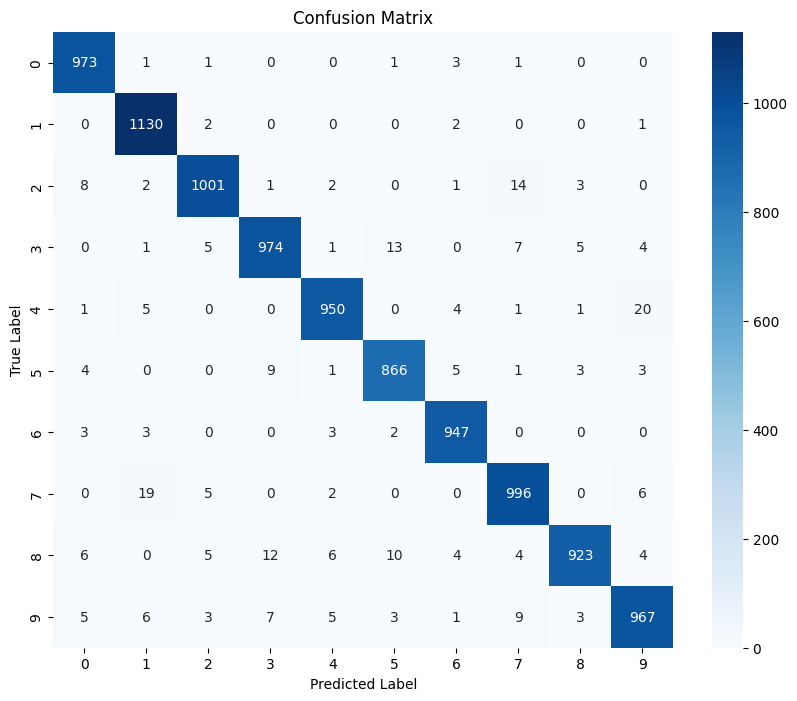

In [11]:
# Make predictions on the PCA-reduced test data
y_pred = knn.predict(X_test_pca)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Print a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

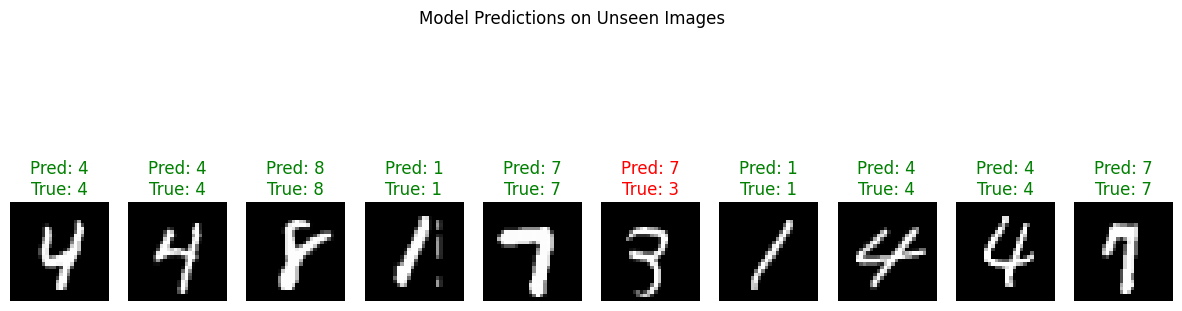

In [12]:
# Get a random selection of test images
num_images = 10
random_indices = np.random.choice(len(X_test), num_images, replace=False)

fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

for i, idx in enumerate(random_indices):
    # Get the original image and its PCA representation
    img = X_test[idx]
    img_pca = X_test_pca[idx].reshape(1, -1)

    # Predict the digit
    prediction = knn.predict(img_pca)[0]
    true_label = y_test[idx]

    # Display the image
    ax = axes[i]
    ax.imshow(img, cmap='gray')
    ax.axis('off')

    # Set the title with the prediction and true label
    title_color = 'g' if prediction == true_label else 'r'
    ax.set_title(f"Pred: {prediction}\nTrue: {true_label}", color=title_color)

plt.suptitle("Model Predictions on Unseen Images")
plt.show()